In [59]:
# import all imp library

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [10]:
#import vgg 19 liabrary 
# Here we use Imagenate weights

mobinet = VGG19(input_shape=IMAGE_SIZE +[3], weights='imagenet',include_top=False)
mobinet

In [11]:
# for not trainig the existing weights value 
for layer in mobinet.layers:
    layer.trainable = False

In [14]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [18]:
# our layers - you can add more if you want
x= Flatten()(mobinet.output)

In [25]:
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=mobinet.input, outputs=prediction)

In [26]:
# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [27]:
from tensorflow.keras.layers import MaxPooling2D

In [33]:
model= Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50176)            

In [34]:
# tell the model what cost and optimization method to use

model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator (rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_data= ImageDataGenerator(rescale=1/255)

In [37]:
train_set = train_data.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [39]:
train_set

In [41]:
test_set = test_data.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [56]:
r= model.fit_generator(
train_set,
validation_data=test_set,
epochs=10,
steps_per_epoch=len(train_set),
validation_steps=len(test_set))

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 0.0501 - accuracy: 0.9808 - val_loss: 0.3660 - val_accuracy: 0.8881
Epoch 2/10
13/13 [==============================] - 22s 2s/step - loss: 0.0222 - accuracy: 0.9952 - val_loss: 0.2573 - val_accuracy: 0.9403
Epoch 3/10
13/13 [==============================] - 18s 1s/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.3450 - val_accuracy: 0.9179
Epoch 4/10
13/13 [==============================] - 19s 1s/step - loss: 0.0101 - accuracy: 0.9952 - val_loss: 0.2477 - val_accuracy: 0.9403
Epoch 5/10
13/13 [==============================] - 19s 1s/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.2554 - val_accuracy: 0.9403
Epoch 6/10
13/13 [==============================] - 19s 1s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3768 - val_accuracy: 0.9254
Epoch 7/10
13/13 [==============================] - 19s 1s/step - loss: 0.0108 - accuracy: 0.9952 - val_loss: 0.2205 - val_accuracy: 0.9552
Epoch 8/10
13/13 [==

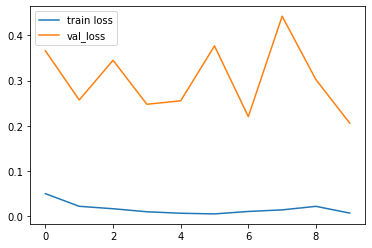

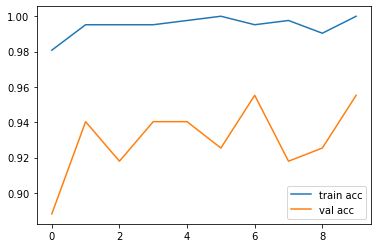

<Figure size 432x288 with 0 Axes>

In [57]:
# plot the loss

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()


# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Malaria_Vgg19.h5')